# An example of ILP in Sage for grids

Here we give an example of using ILP solvers in Sage to find the optimum number of lines covering grids. 

### First, create functions to generate all lines! 

Credit: code from Bachelor Thesis of Yvonne den Bakker

In [15]:
# Returns a collection of all vertical and horizontal lines in X x Y,
# where each line ax+by=c is represented by [a,b,c]
def hvlines(X,Y):
    linecoords = [0,0,0]
    total = np.array([])
    for i in range(len(X)):
        linecoords[0] = 1
        linecoords[1] = 0
        linecoords[2] = X[i]
        total = np.append(total, linecoords)
    for j in range(len(Y)):
        linecoords[0] = 0
        linecoords[1] = 1
        linecoords[2] = Y[j]
        total = np.append(total,linecoords)
    total2 = [[0,0,0] for _ in range(len(X)+len(Y))]
    for k in range(len(X)+len(Y)):
        total2[k] = total[3*k:3*k+3]
    return total2



# Returns the line through point a and point b
# where each line ax+by=c is represented by [a,b,c]
def linethr(a,b):
    linecoords=[0,0,0]
    if (a[1]< b[1] and a[0]<b[0]) or(a[1]> b[1] and a[0]>b[0]):
        #if (a_y < b_y and a_x < b_x) or (a_y > b_y and a_x > b_x), the line is increasing.
        linecoords[1] = 1
        linecoords[0] = -abs(a[1]-b[1])*(abs(a[0]-b[0]))**(-1)
        linecoords[2] = min(a[1],b[1])+ min(a[0],b[0])*linecoords[0]
        return linecoords
    
    if (a[1]< b[1] and a[0]>b[0]) or (a[1]> b[1] and a[0]<b[0]):
        #if (a_y < b_y and a_x > b_x) or (a_y > b_y and a_x < b_x), the line is decreasing.
        linecoords[1] = 1
        linecoords[0] = abs(a[1]-b[1])*(abs(a[0]-b[0]))**(-1)
        linecoords[2] = max(a[1],b[1])+ min(a[0],b[0])*linecoords[0]
        return linecoords

In [16]:
linethr((1, 1),(2, 3))

[-2, 1, -1]

In [17]:
# Returns a list containing all horizontal, vertical, increasing and decreasing
# lines through every point in the grid X x Y
def createlines(X,Y): #Where X and Y are the n resp. m elements of the grid
    total = hvlines(X,Y)
    lines = set(tuple(i) for i in total)
    for i in range(len(X)):
        for j in range(len(Y)):
            for k in range(len(X)):
                for l in range(len(Y)):
                    if X[i]!=X[k] and Y[j]!=Y[l]:
                        lines.add(tuple(linethr([X[i],Y[j]],[X[k],Y[l]])))
    return list(lines)

### Now, we create a grid, and generate all lines on it!

We can use numpy, a python package for high powered arrays and numerical computation.

In [18]:
import numpy as np

In [19]:
# Dimensions of our grid
n = 4
m = 3
k = 2

# Make a linear grid
X = list(np.linspace(0, n-1, n))
Y = list(np.linspace(0, m-1, m))

# Create a list of all lines going through at least two points in the grid
Lines = createlines(X,Y)

# Create a list of all points in the grid
pts = []
N = n*m
M = len(Lines)
for Xi in X:
    for Yj in Y:
        pts.append([Xi,Yj])

print(f'{N} points and {M} lines!')

12 points and 35 lines!


In [20]:
pts

[[0.0, 0.0],
 [0.0, 1.0],
 [0.0, 2.0],
 [1.0, 0.0],
 [1.0, 1.0],
 [1.0, 2.0],
 [2.0, 0.0],
 [2.0, 1.0],
 [2.0, 2.0],
 [3.0, 0.0],
 [3.0, 1.0],
 [3.0, 2.0]]

In [21]:
Lines

[(-1.0, 1, -1.0),
 (-2.0, 1, -2.0),
 (-1.0, 1, -2.0),
 (0.0, 1.0, 0.0),
 (-1.0, 1, 1.0),
 (2.0, 1, 6.0),
 (-0.3333333333333333, 1, 1.0),
 (1.0, 0.0, 1.0),
 (1.0, 1, 3.0),
 (0.3333333333333333, 1, 2.0),
 (-0.5, 1, 1.0),
 (2.0, 1, 2.0),
 (-1.0, 1, 0.0),
 (-2.0, 1, 0.0),
 (0.0, 1.0, 2.0),
 (-0.3333333333333333, 1, 0.0),
 (0.5, 1, 2.0),
 (-0.6666666666666666, 1, 0.0),
 (1.0, 1, 2.0),
 (1.0, 0.0, 0.0),
 (0.3333333333333333, 1, 1.0),
 (0.5, 1, 2.5),
 (1.0, 0.0, 3.0),
 (-2.0, 1, -4.0),
 (0.6666666666666666, 1, 2.0),
 (-0.5, 1, 0.0),
 (0.0, 1.0, 1.0),
 (-0.5, 1, -0.5),
 (-0.5, 1, 0.5),
 (1.0, 0.0, 2.0),
 (0.5, 1, 1.5),
 (2.0, 1, 4.0),
 (1.0, 1, 4.0),
 (0.5, 1, 1.0),
 (1.0, 1, 1.0)]

In [22]:
# Which point do we want to avoid?
# Default is (0,0) but can be altered.
MPx = 0
MPy = 0

# Make avoided point the first one in the list
if not (MPx == MPy and MPx == 0):
    pts[0],pts[n*MPx + MPy] = pts[n*MPx + MPy], pts[0]

In [23]:
# Tells us if pts[i] lies on Lines[j] 
def ksi(i,j): 
    if pts[i][0]*Lines[j][0] + pts[i][1]*Lines[j][1] == Lines[j][2]:
        return 1
    else:
        return 0

### Now, we write down the ILP to represent the problem!

In [24]:
p = MixedIntegerLinearProgram(maximization=False, solver = "GLPK")
w = p.new_variable(integer=True, nonnegative=True)

# Objective to minimize is the number of lines
p.set_objective(sum(w[line] for line in range(M)))

const_matrix = np.zeros((N,M))
for l in range(N):
    for i in range(M):
        const_matrix[l,i] = ksi(l,i)

k_consts = matrix(const_matrix[1:,:])
print(k_consts)

[0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]
[0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0]
[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]
[0.0 1

In [25]:
zero_const = matrix(const_matrix[0:1,:])
print(zero_const)

[0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]


In [27]:
# Every point must be covered at least k times
p.add_constraint(k_consts * w >= k)

p.add_constraint(zero_const * w == 0)

p.show()

Minimization:
  x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 + x_11 + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + x_18 + x_19 + x_20 + x_21 + x_22 + x_23 + x_24 + x_25 + x_26 + x_27 + x_28 + x_29 + x_30 + x_31 + x_32 + x_33 + x_34 

Constraints:
  - x_4 - x_6 - x_10 - x_19 - x_20 - x_26 - x_33 - x_34 <= -2.0
  - x_9 - x_11 - x_14 - x_16 - x_18 - x_19 - x_24 <= -2.0
  - x_0 - x_1 - x_3 - x_7 - x_11 - x_27 - x_34 <= -2.0
  - x_7 - x_12 - x_18 - x_26 - x_28 - x_30 <= -2.0
  - x_4 - x_7 - x_8 - x_13 - x_14 - x_21 - x_31 <= -2.0
  - x_2 - x_3 - x_18 - x_23 - x_29 - x_31 - x_33 <= -2.0
  - x_0 - x_8 - x_16 - x_25 - x_26 - x_29 <= -2.0
  - x_1 - x_5 - x_10 - x_12 - x_14 - x_29 - x_32 <= -2.0
  - x_3 - x_5 - x_8 - x_20 - x_22 - x_24 - x_30 <= -2.0
  - x_2 - x_9 - x_15 - x_21 - x_22 - x_26 - x_27 - x_32 <= -2.0
  - x_0 - x_6 - x_14 - x_17 - x_22 - x_23 - x_28 <= -2.0
  0.0 <= x_3 + x_12 + x_13 + x_15 + x_17 + x_19 + x_25 <= 0.0
  - x_4 - x_6 - x_10 - x_19 - x_20 - x_26 - x_33 

In [28]:
p.solve()

8.0

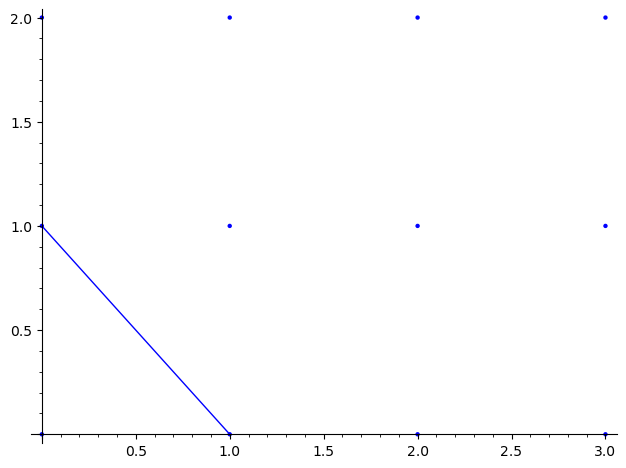

In [67]:
l = line([(1, 0), (0, 1)])
p = point(pts)
plot(l + p)